# Analiza koronawirusa na świecie <br>
## Autor: Oskar Wenerowicz

Celem projektu jest przeprowadzenie analizy zmiennych opisujących sytuację związaną z koronawirusem w wybranych państwach na świecie. Do analizy wybrano państwa ze wszystkich kontynentów.

Do analizy wybrano następujące zmienne: 
* total_cases - **wszystkie pozytywne przypadki koronawirusa w danym państwie**
* total_deaths - **wszystkie śmierci spowodowane koronawirusem w danym państwie**
* total_cases_per_million - **pozytywne przypadki koronawirusa w danym państwie przeliczone na milion ludności**
* total_deaths_per_million - **przypadki śmierci na koronawirusa w danym państwie przeliczone na milion ludności**
* ppl_full_vac - **liczba ludzi zaszczepionych min. 2 dawkami szczepionki (lub jedną w przypadku szczepionki J&J)**
* population - **populacja danego kraju**
* percent_vac - **procent zaszczepionej populacji w danym kraju**
* vac_per_million - **liczba osób zaszczepionych w danym kraju przeliczone na milion ludności**

### Wczytanie pakietów

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

### Wczytanie stworzonego dataset'u

In [2]:
data = pd.read_excel('C:/Users/Oskar/Desktop/data_projektt.xlsx').round(2)
data = data.sort_values(by='percent_vac')
data.head(5)

,continent,country,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,ppl_full_vac,population,percent_vac
32,Africa,Ethiopia,459486,7184,3898.04,60.94,1596443,117876226,0.01
23,Africa,Cameroon,109666,1853,4028.24,68.06,663317,27224262,0.02
33,Africa,Gabon,45405,299,19924.71,131.21,173123,2278829,0.08
34,Africa,Ghana,154190,1350,4859.11,42.54,2918596,31732128,0.09
36,Asia,Iraq,2125266,24262,51609.99,589.18,6089527,41179351,0.15


## **Wizualizacja kształtowania się zmiennych**

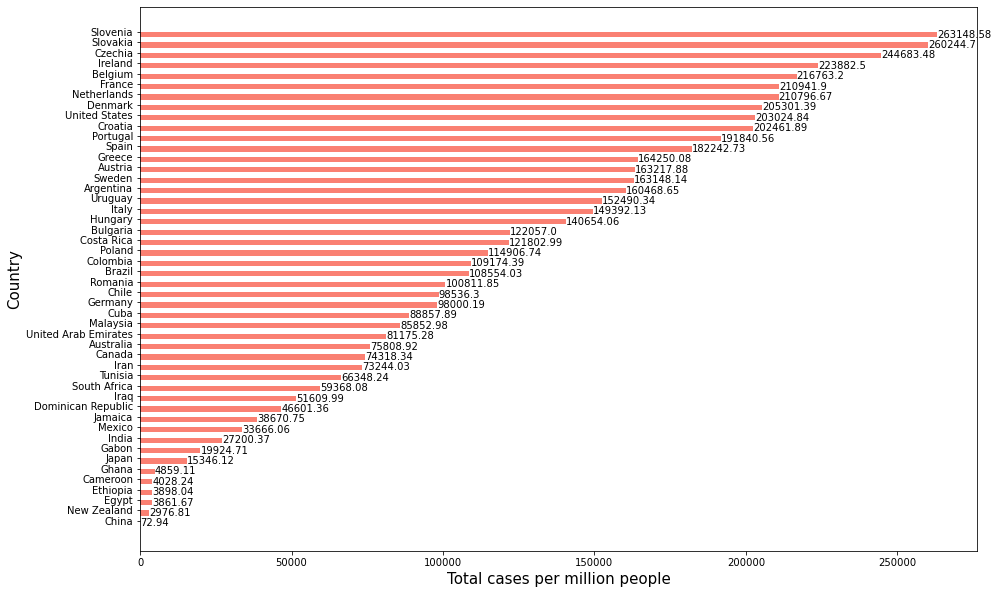

In [124]:
data = data.sort_values(by='total_cases_per_million')
y = data.total_cases_per_million
x = data.country
fig, ax = plt.subplots(figsize=(15,10))
width = 0.5
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="salmon")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.xlabel("Total cases per million people", size=15)
plt.ylabel("Country", size=15)
for i, v in enumerate(y):
    ax.text(v + 3, i , str(v), color='black', verticalalignment='center')
plt.show()

Jak możemy zauważyć najwięcej przypadków na milion mieszkańców zanotowano w Słowenii oraz Słowacji. W zestawieniu niestety przodują kraje europejskie. <br><br> 
Polska znajduje się w środku stawki. Najmniej przypadków na milion zanotowano w Chinach, oczywiście jest to spowodowane tym, że Chiny to państwo komunistyczne i prawdopodobnie dane na temat koronawirusa są fałszowane i nie podawane w pełni dla opinii publicznej. Dodatkowo, sposoby walki z koronawirusem wykorzystywane przez Rząd Chiński wydają się być drastyczne, dlatego liczba zakażeń przy tak ogromnej populacji nie wydaje się być wysoka. <br><br>
Oceania jako kontynent w porównaniu do innych kontynentów wyróżnia się tym, że notuje wyraźnie najmniej przypadków na milion mieszkańców. Zapewne jest to spowodane tym, że od początku pandemii kraje z tego kontynentu mają bardzo zaostrzone zasady dotyczące przekraczania granic państw.

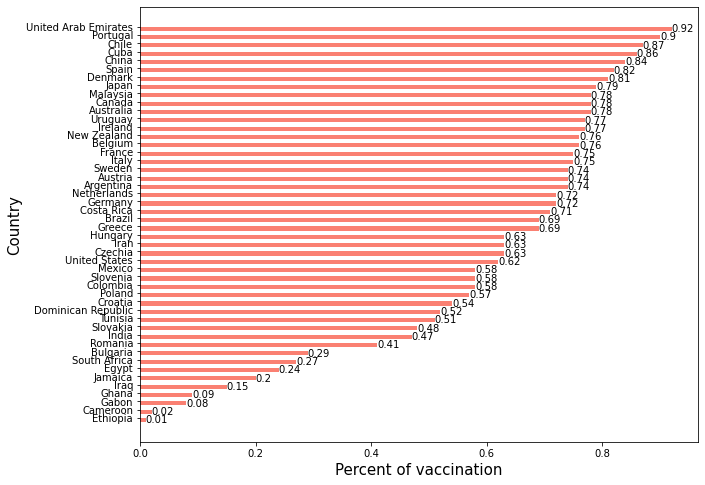

In [122]:
data = data.sort_values(by='percent_vac')
y = data.percent_vac.round(3)
x = data.country
fig, ax = plt.subplots(figsize=(10,8))
width = 0.5
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="salmon")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.xlabel("Percent of vaccination", size=15)
plt.ylabel("Country", size=15)
for i, v in enumerate(y):
    ax.text(v, i , str(v), color='black', verticalalignment='center')
plt.show()

Na powyższym wykresie widzimy, że najlepiej zaszczepionym państwem są **Zjednoczone Emiraty Arabskie, Portugalia oraz Kanada**. <br><br>
**Polska** z 57% jak przeważnie nie wyróżnia się w żaden sposób na tle innych państw i znajduję się w samym śordku zestawienia. <br><br>
Państwami z najniższym wskaźnikiem zaszczepień są **Etiopia** oraz **Kamerun**. Ogólnie Afryka jako kontynent bardzo odstaje od pozostałych bardziej rozwiniętych kontynentów. 


## Statystyki opisowe dla analizowanych zmiennych

In [9]:
pd.options.display.float_format = '{:.1f}'.format
data.describe().round(1)


# To revert back, you can use pd.reset_option with a regex to reset more than one simultaneously. 
# In this case to reset all options starting with display you can:
# pd.reset_option('^display.', silent=True)

,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,ppl_full_vac,population,percent_vac,vac_per_million
count,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0
mean,3014435.7,55595.1,113266.6,1606.2,46504304.3,67203414.2,0.6,597511.8
std,4229657.0,103090.9,77164.0,1202.2,177326891.4,212128823.5,0.3,252614.0
min,15249.0,52.0,72.9,3.2,173123.0,2078723.0,0.0,13543.4
25%,667443.2,6089.5,53549.5,593.2,3867627.8,9190844.5,0.5,516535.7
50%,1680503.5,21715.0,104682.9,1547.7,8376349.5,18150433.0,0.7,699741.5
75%,3380719.5,54645.5,163992.0,2437.5,28697401.0,50135683.5,0.8,773122.4
max,23229851.0,621803.0,263148.6,4688.9,1207413000.0,1444216102.0,0.9,922621.7


## Podsumowanie według zmiennej kategorialnej

Wybrane zmienne zostały poddane analizie według grupowania po zmiennej kategorialnje tj. "continent".

<AxesSubplot:title={'center':'Continent'}>

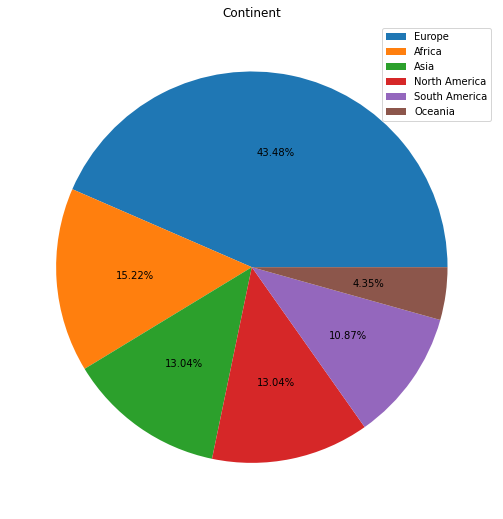

In [10]:
data.continent.value_counts().plot.pie(ylabel='',
                                    legend=True,
                                    labeldistance=None,
                                    autopct='%.2f%%',
                                    title='Continent',
                                    figsize=(9,9))

Na podstawie powyższego wykresu kołowego można zauważyć, że najwięcej obserwacji pochodzi z Europy, jednakże w stworzonym dataset'cie występują kraje z każdego z kontynentów na Ziemi.

<AxesSubplot:xlabel='continent'>

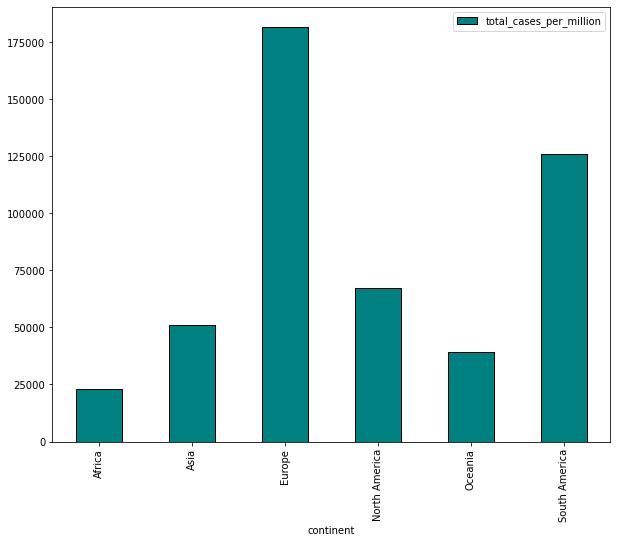

In [18]:
data[['total_cases_per_million','continent']].groupby('continent').mean().plot.bar(color='teal', edgecolor='black', 
                                                                       figsize = (10,8)) 

Średnią najwyższa liczbą przypadków charakteryzuje się Europa, która zdecydowanie góruje nad następną Ameryką Południową. Najniższa wartość została przypożądkowana Afryce, gdzie poziom rozwoju państw wpływa na bagatelizowanie problemu pandemii, przez co statystyki są zaniżone.

<AxesSubplot:xlabel='continent'>

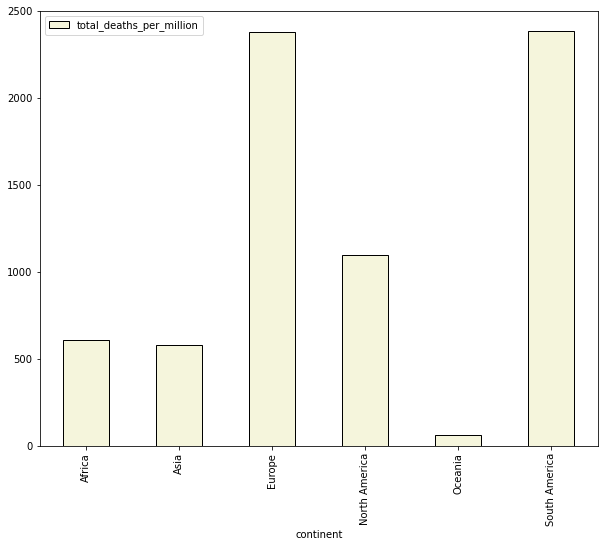

In [19]:
data[['total_deaths_per_million','continent']].groupby('continent').mean().plot.bar(color='beige', edgecolor='black', 
                                                                       figsize = (10,8))


Najtragiczniejsza statystyka w kontekście pandemii w przeliczeniu na milion mieszkańców została przedstawiona na powyższym wykresie. Przoduje Europa i Ameryka Południowa, jednakże różnica nie jest tak duża jak w przypadku średniej liczby zakażeń. Wskazuje to na wyższy poziom śmiertelności w krajach południowoamerykańskich.

<AxesSubplot:xlabel='continent'>

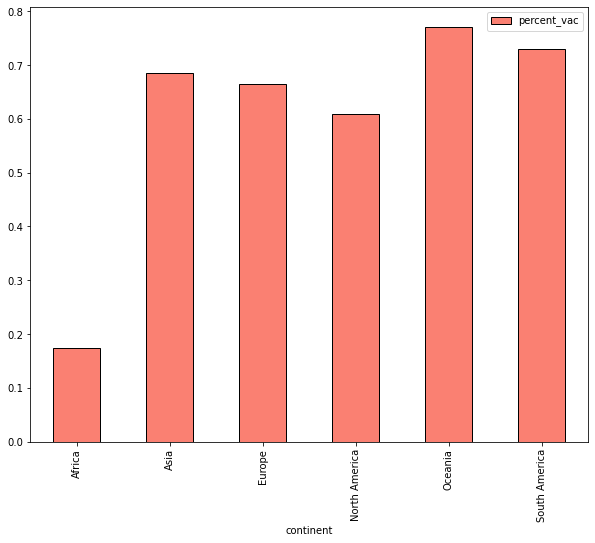

In [20]:
data[['percent_vac','continent']].groupby('continent').mean().plot.bar(color='salmon', edgecolor='black',
                                                                       figsize = (10,8))

Średnia obliczona z procentu zaszczepionych dla wszytskich kontynentów, pozwala zauważyć, że poziom zaszczepienia na kontynentach jest bardzo zbliżony, za wyjątkiem Afryki. Czarny Ląd zdecydowanie odbiega od pozostałych kontynetów, ponieważ poziom zaszczepienia w tamtejszych państwach jest naprawdę niski.

<AxesSubplot:ylabel='continent'>

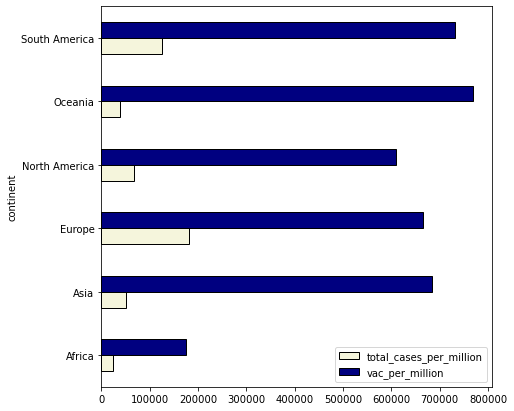

In [8]:
data[['total_cases_per_million',
      'vac_per_million',
      'continent']].groupby('continent').mean().plot.barh(color=['beige','navy'], 
                                                          edgecolor='black',
                                                          figsize = (7,7))

Powyższy wykres przedstawia stosunek średniej liczby odnotowanych przypadków na milion mieszkańców do liczby zaszczepionych na milion mieszkańców. Z wykresu można odczytać, jak duży procent społeczeństwa stanowią osoby zaszczepione, w porównaiu do osób, które zachorowały na COVID-19.

## Badanie korelacji pomiędzy zmiennymi

Do analizy korelacji odrzucamy zmienne:
* **population**;
* **vac_per_million**.

In [50]:
data_a = data.iloc[:,[2,3,4,5,6, -2]]
data_a.head(5)

,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,ppl_full_vac,percent_vac
32,459486,7184,3898.0,60.9,1596443,0.0
23,109666,1853,4028.2,68.1,663317,0.0
33,45405,299,19924.7,131.2,173123,0.1
34,154190,1350,4859.1,42.5,2918596,0.1
36,2125266,24262,51610.0,589.2,6089527,0.1


In [51]:
# macierz korelacji
corr_matrix = data_a.corr().round(3)
corr_matrix

,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,ppl_full_vac,percent_vac
total_cases,1.0,0.9,0.2,0.3,0.0,0.2
total_deaths,0.9,1.0,-0.0,0.3,0.1,0.1
total_cases_per_million,0.2,-0.0,1.0,0.6,-0.2,0.4
total_deaths_per_million,0.3,0.3,0.6,1.0,-0.2,0.1
ppl_full_vac,0.0,0.1,-0.2,-0.2,1.0,0.2
percent_vac,0.2,0.1,0.4,0.1,0.2,1.0


<AxesSubplot:>

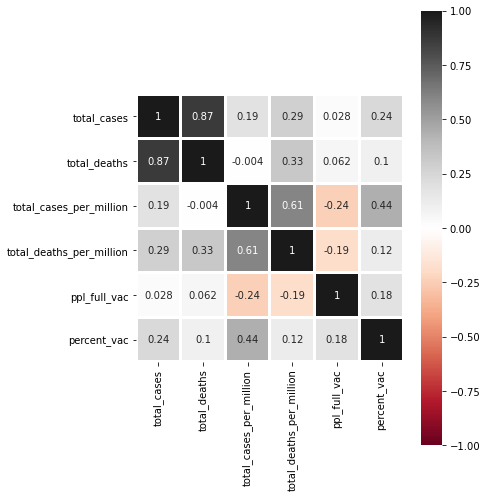

In [52]:
plt.figure(figsize=(6,8))
sns.heatmap(corr_matrix, 
            vmin=-1, 
            vmax=1, 
            cmap='RdGy',
            linecolor='white',
            linewidth=2,
            #cbar=False,
            annot=True,
            square=True,
            cbar_kws={"orientation": "vertical"})

Na podstawie analizy korelacji można zauważyć, że najbardziej skorelowane ze sobą sa zmienne total_cases oraz total_deaths, ta korelacja wynosi 0.87. Wskazuje to na silną korelację między zmiennymi. <br><br>
Co za tym idzie drugą najlepiej skorelowaną parą zmiennych są total_cases_per_million oraz total_deaths_per_million wynosi on 0.61. Natomiast najmniej skorelowaną parą zmiennych jest para total_cases_per_million i total_deaths -0.004.

## Analiza Skupień

In [30]:
data_b = pd.read_excel('C:/Users/user/Desktop/data_projektt.xlsx',
                    index_col='country')
data_b.head(2)

,continent,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,ppl_full_vac,population,percent_vac,vac_per_million
country,,,,,,,,,
Austria,Europe,1475991,13942,163217.9,1541.7,6668850,9043072,0.7,737454.0
Belgium,Europe,2521462,28695,216763.2,2466.8,8836352,11632334,0.8,759637.1


In [35]:
#wybór zmiennych do analizy skupień

data_c= data_b.iloc[:, [3,4,5,-2]]
data_c.head(2)

,total_cases_per_million,total_deaths_per_million,ppl_full_vac,percent_vac
country,,,,
Austria,163217.9,1541.7,6668850,0.7
Belgium,216763.2,2466.8,8836352,0.8


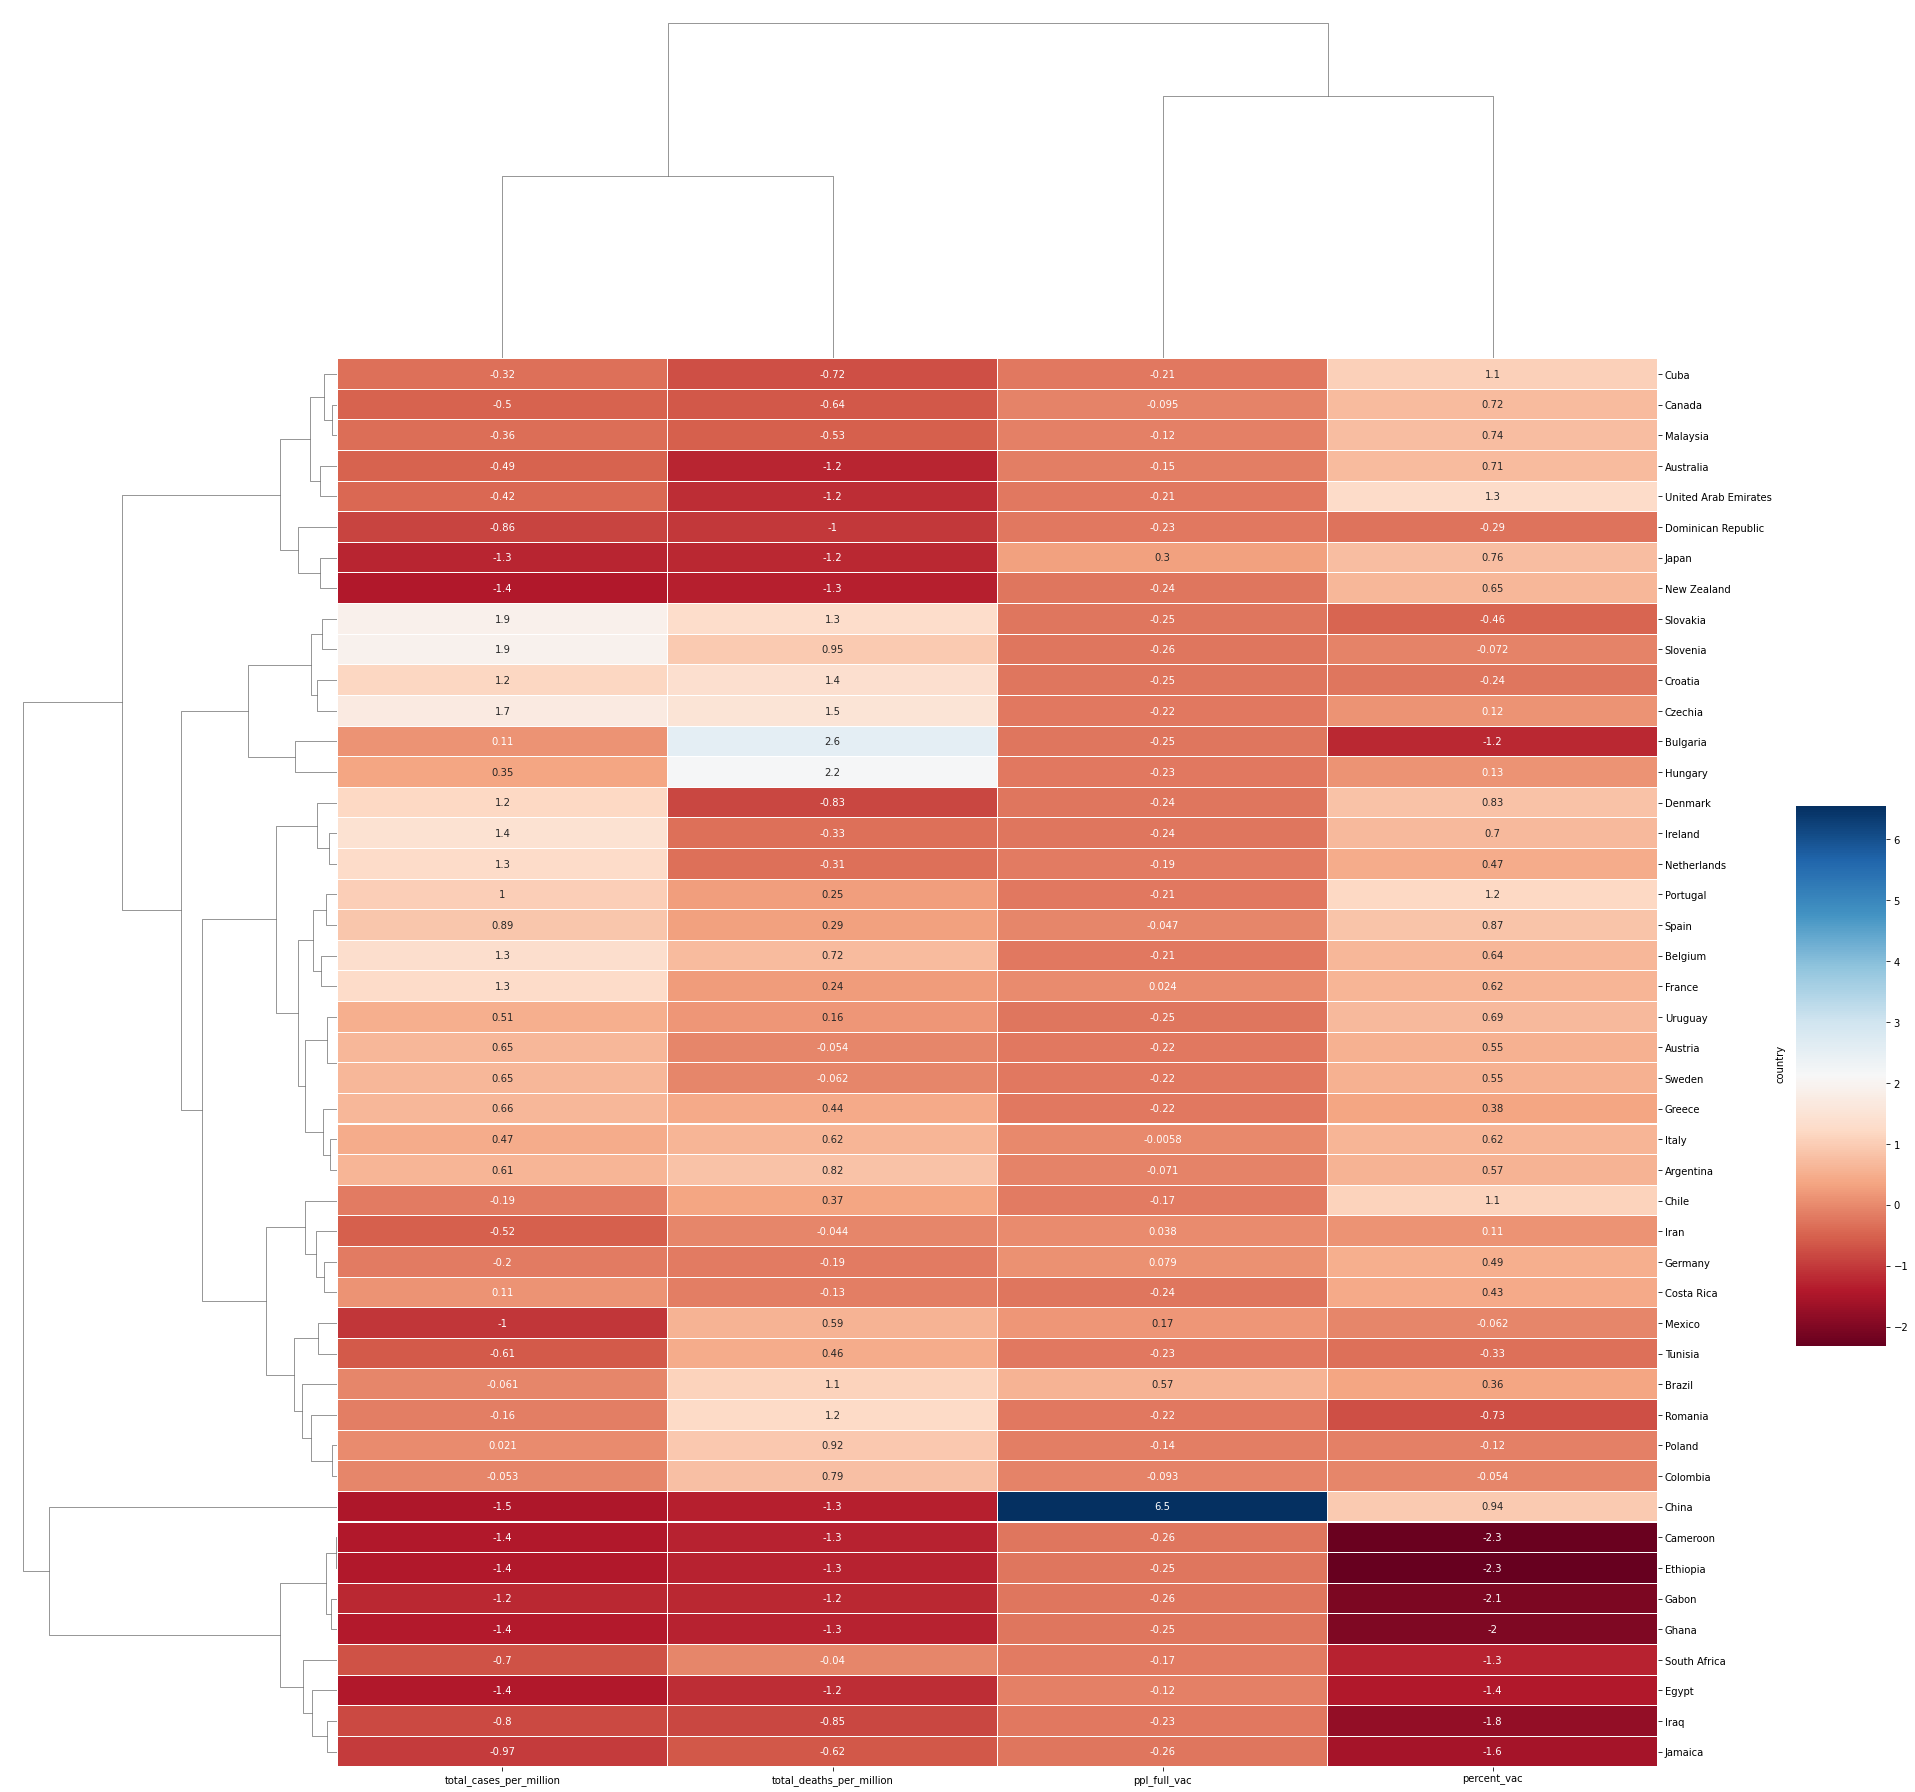

In [36]:
sns.clustermap(data_c.iloc[:, :], 
               z_score=1,
               cmap='RdBu',
               method='ward',
               cbar_pos=(1, 0.25, 0.05, 0.3),
               annot=True,
               linewidth=0.05,
               linecolor='white',
               figsize=(25,25))

Analiza skupień zosała przeprowadzona za pomocą metody **Warda**. <br>
Na podstawie uzyskanych wyników, można zaobserwować wyróżniające się 5 grup państw. <br><br>

W pierwszej z nich znajdują się państwa, których sposoby walki z koronawirusem są najbardziej radykalne np. całkowite zamknięcie kraju, a poziom szczepień jest jednym z najwyższych na świecie. Te państwa to m.in. Australia, ZEA czy Japonia. Dodatkowo w tej grupie znalazły się takie państwa jak Kuba i Dominikana. Przynależność tych karaibskich państw do tej grupy może wynikać z małej wiarygodności dostarczanych danych lub po prostu ignorowania pandemii, w celu przyciągniecia turystów - jak zrobiła to Dominikana. <br><br>

W kolejnej grupie znalazły się głównie państwa europejskie takie jak Chorwacja, Słowenia czy Słowacja. Cechą wspólną tej grupy, która wyróżnia je na tle reszty są podobne wartości przypadków zakażeń na milion mieszkańców.  <br><br>

Trzecia grupa składa się z państw europejskich wysokorozwiniętych. Zostały w niej sklasyfikowane m.in. Francja, Belgia, Szwecja, ale także kraje z Ameryki Południowej np. Argentyna. Są to państwa, które z zasady dobrze radzą sobie z pandemią, a większość wartości uwzględnionych w analizie skupień nie wyróżnia się ani pozytywnie, ani negatywnie.<br><br>

**Polska** została sklasyfikowana z czwartej grupie wraz z Niemcami, ale także z krajami egzotycznymi, takimi jak Brazylia, Kolumbia czy Meksyk. Sytuację pandemiczną w tych krajach można nazwać "nie najlepszą". <br><br>

Ostatnia grupa składa się z krajów charakteryzujących się bardzo niskim poziomem szczepień, dlatego znalazły się tam państwa afrykańskie, z bliskiego wschodu oraz Jamajka.<br><br>

Warto zwrócić uwagę również na Chiny, które trudno zakwalifikować do jakiejkolwiek grupy. Specyfika tego państwa sprawia, że zdecydowanie można je nazwać obserwacją odstającą.

## Modelowanie ekonometryczne

In [44]:
#Dodanie stałej

data_d = sm.add_constant(data)
data_d.head(2)

,const,continent,country,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,ppl_full_vac,population,percent_vac,vac_per_million
32,1.0,Africa,Ethiopia,459486,7184,3898.0,60.9,1596443,117876226,0.0,13543.4
23,1.0,Africa,Cameroon,109666,1853,4028.2,68.1,663317,27224262,0.0,24364.9


W modelu 1 jako zmienna ojaśniana została wybrana zmienna total_deaths, natomiast zmienną objaśniającą została zmienna total_cases.

In [49]:
# model ekonometryczny z jedną zmienną objaśniającą

model1 = sm.OLS(endog = data_d['total_deaths'], 
                 exog = data_d[['const','total_cases']]).fit()

# wyświetlenie wyników
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_deaths   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     139.2
Date:                Mon, 24 Jan 2022   Prob (F-statistic):           3.20e-15
Time:                        18:58:30   Log-Likelihood:                -562.95
No. Observations:                  46   AIC:                             1130.
Df Residuals:                      44   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8449.6711   9284.886     -0.910      0.368   -2.72e+04    1.03e+04
total_cases     0.0212      0.002     11.799      0.000       0.018       0.025
==============================================================================
Omnibus:                       30.185   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.238
Skew:                           1.278   Prob(JB):                     1.60e-35
Kurtosis:                      11.779   Cond. No.                     6.36e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Współczynnik R^2 wyniósł 0,76 co świadczy o dobrym dopasowaniu modelu do danych. <br><br>

Statystyka **Fishera** jest bardzo wysoka oraz p-value(F-statistic) jest zbliżone do zera, oznacza to, że **przynajmniej jeden parametr różni się istotnie od zera.** <br><br>

**Kurtoza** jest bardzo wysoka, co za tym idzie rozkład jest **"wyszczuplony"**. Bardzo wysoka **statystyka JB** oraz bardzo niskie **p-value(JB)**, to mówi nam, że H0 należy odrzucić. **Reszty nie mają rozkładu normnalnego.** <br><br>

**Test Omnibus** oraz **p-value(Omnibus)** jest dokładnym odwzierciedleniem **testu JB** i można z niego wyciągnąć tożsame wnioski. **Reszty nie mają rozkładu normnalnego.** <br> <br>

Na podstawie **p-value** należałoby odrzucić **stałą**, ponieważ jest ona **nie istotna.** <br><br>

Natomiast w przypadku zmiennej **total_cases**, **p-value** jest bliskie zeru co oznacza, że zmienna **wpływa istotnie na model.** Zatem przejdźmy do interpretacji jej współczynnika kierunkowego. <br><br>

Wraz ze wzrostem liczby **pozytywnych przypadków na koronawirusa o 100 przeciętna liczba zgonów** wyniesie **2,12 zgonu** przy pozostałych czynnikach niezmienionych. 